Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ayush Koirala"
ID = "st122802"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Example 1: Root finding for cubic polynomial 

In [3]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [4]:
n = 200
x = np.linspace(-3, 3, n)  

# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [x^3, x^2, x^1, 1]

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])
p_d = np.polyder(p)
print('p derivative:', p_d)
print('p derivative:', p_d[2], p_d[1], p_d[0])

# Get values for f(x) and f'(x) for graphing purposes
y = fx(x, p)
y_d = fx(x,p_d)

p derivative:    2
3 x + 2 x
p derivative: 3 2 0


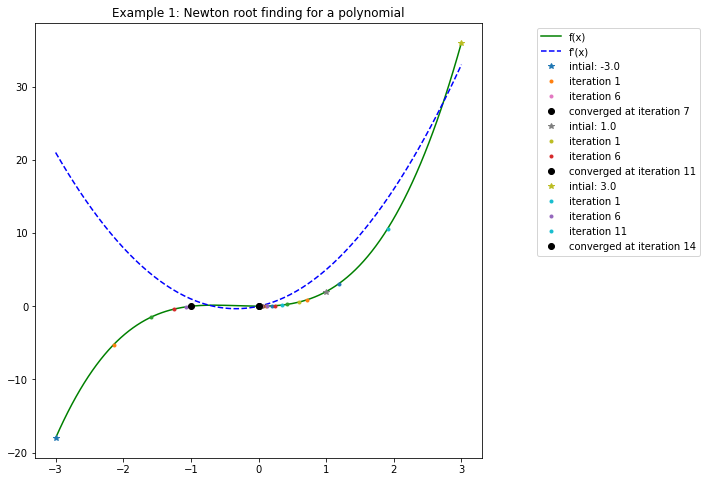

In [5]:
# Try three possible guesses for x0
x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()

#### Example 2: Root finding for sine function

In [6]:
def fx_sin(x):  
    f_x = np.sin(x)        
    return f_x

def fx_dsin(x):    
    return np.cos(x)

In [7]:
n = 200

x = np.linspace(-np.pi, np.pi, n)  

# Get f(x) and f'(x) for plotting
y = fx_sin(x)
y_d = fx_dsin(x)

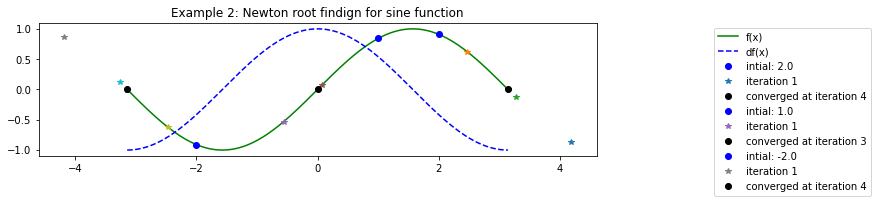

Roots: 3.141593, 0.000000, -3.141593


In [8]:
# Consider three possible starting points
x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx_sin(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx_sin(x0) / fx_dsin(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx_sin(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx_sin(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx_sin(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [9]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = np.array([[(sigma_1)**2,0],[0,(sigma_1)**2]],np.int32)
X1 =np.random.multivariate_normal(mu_1, cov_mat, num_sample)
print(x1)
# YOUR CODE HERE
#raise NotImplementedError()

-3.1415926536808043


In [10]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[ 1.75937417  2.77842606]
 [ 0.01937165  1.41921358]
 [ 0.83744212  0.67560016]
 [ 0.15920174 -0.0890394 ]
 [ 1.01949478  2.33950719]]
success!


**Expect result (or looked alike):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate samples.
</details>

In [11]:
# 1. Create sample angle from 0 to 2pi with 100 samples
import math
angle = np.random.uniform(0,2*(math.pi),100)
# 2. Create sample with normal distribution of d with mean and variance
d =  np.random.normal((3*sigma_1)**2,((1/2)*sigma_1)**2,100)
# 3 Create X2
x1dcos = X1[:,0] + d*np.cos(angle)
x2dsin = X1[:,1] + d*np.sin(angle)
X2 = np.array([x1dcos,x2dsin]).T
print(X2[:5])
# YOUR CODE HERE
#raise NotImplementedError()

[[-4.66191235 -3.69858057]
 [ 1.02003835 -7.47315113]
 [ 6.32163176 -6.0065055 ]
 [ 3.44469592 -8.75017403]
 [ 0.4588583  11.28695811]]


In [12]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [3.93131075 4.82444856 5.39964164 5.07495706 1.63337331]
d: [9.12055565 8.9484906  8.64447061 9.26335388 8.96499811]
X2: [[-4.66191235 -3.69858057]
 [ 1.02003835 -7.47315113]
 [ 6.32163176 -6.0065055 ]
 [ 3.44469592 -8.75017403]
 [ 0.4588583  11.28695811]]
success!


**Expect result (or looked alike):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [13]:
# 1. concatenate X1, X2 together
X = np.concatenate((X1,X2),axis=0)
# 2. Create y with class 1 as 0 and class 2 as 1
y = np.append(np.zeros(num_sample),np.ones(num_sample))

# YOUR CODE HERE
#raise NotImplementedError()

In [14]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200,)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

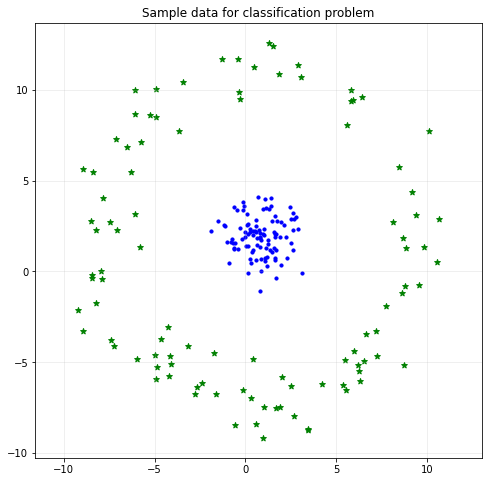

In [15]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
class1= np.where(y==0)
class2 = np.where(y==1)

plt.scatter(X[class1,0], X[class1,1],c='b',s=10)
plt.scatter(X[class2,0], X[class2,1],c='g',marker='*')
# YOUR CODE HERE
#raise NotImplementedError()
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

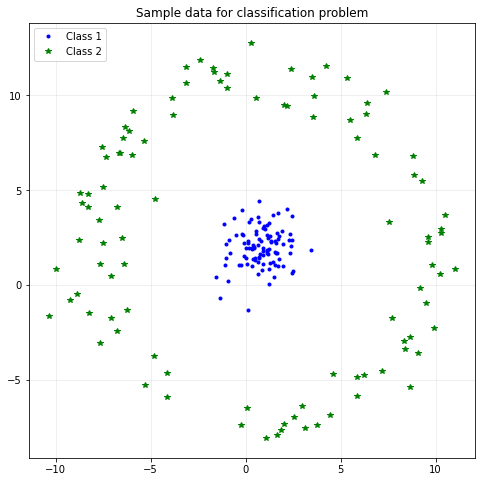

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [16]:
import random
train_size = 0.8
m,n = X.shape
index = np.arange(0,m)

random.seed(1000)
random.shuffle(index)
training = round(m*train_size)
idx_train = index[0:training]
idx_test = index[training:]

X_train = X[idx_train,:]
X_test = X[idx_test,:]
y_train = y[idx_train].reshape(-1,1)
y_test = y[idx_test].reshape(-1,1)
print(X_train.shape,y_train.shape)
# YOUR CODE HERE
#raise NotImplementedError()

(160, 2) (160, 1)


In [17]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [126  82   7  11 193  70  86 133 189 196]
train size, X: (160, 2) , y: (160, 1)
test size,  X: (40, 2) , y: (40, 1)
success!


**Expect reult (Or looked alike):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write the function which normalize X set

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook to write the normalize equation.

YOUR ANSWER HERE

In [18]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mean) / std
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return X_norm

In [19]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [20]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1/(1+np.exp(-z))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return s

    def softmax(self, z):
        sm = np.exp(z)/(np.exp(z).sum())
        # YOUR CODE HERE
        #raise NotImplementedError()
        return sm
    
    def h(self,X, theta):
        n = np.dot(X,theta)
        hf= self.sigmoid(n)
        # YOUR CODE HERE
       # raise NotImplementedError()
        return hf
    
    def gradient(self, X, y, y_pred):
        n = y.size
        grad = -(X.T).dot ((y-y_pred)/n)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return grad
        
    def costFunc(self, theta, X, y):
        n=y.size
        y_hat = self.h(X,theta)
        cost = (((-y*np.log(y_hat))-((1-y)*np.log(1-y_hat))).sum())/n
        grad = self.gradient(X,y,y_hat)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta,X,y)
            # 2. update new theta
            theta = theta - alpha*grad
            #theta = None
            # YOUR CODE HERE
            #raise NotImplementedError()
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        y_hat = self.h(X,theta)
        # 2. classify y_predict that what it should be class1 or class2
        for i in range(y_hat.size):
            if y_hat[i]<0.5:
                labels.append(0)
            else:
                labels.append(1)
               
        # 3. append the output from prediction
        # YOUR CODE HERE
       # raise NotImplementedError()
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_predict = self.predict(X,theta)
        percent_correct = 0
        for i in range(y_predict.size):
            if y_predict[i]==y[i]:
                percent_correct = percent_correct +1
        accuracy = (percent_correct/y.size)*100
        # YOUR CODE HERE
        #raise NotImplementedError()
        return accuracy

In [21]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [22]:
alpha = 0.001
iterations = 50000
m,n = X_train.shape
BGD_model = Logistic_BGD()
initial_theta = np.zeros((n+1,1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train,y_train,initial_theta,alpha,iterations)

# YOUR CODE HERE
#raise NotImplementedError()

Minimum at iteration: 49999


[[-0.04644537]
 [-0.09199454]
 [-0.29285505]]
50000
0.6931471805599453


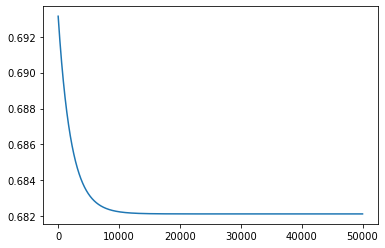

success!


In [23]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expect result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

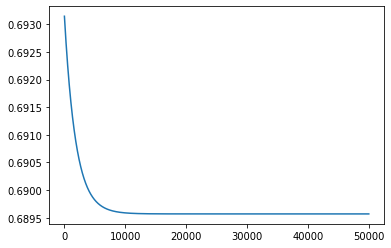

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

In [24]:
# YOUR CODE HERE
#raise NotImplementedError()
def boundary_point(X,theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0]/v_ortho_length
    v_orthogonal = v_orthogonal/v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X@v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho*v_orthogonal 
    point_2 = proj_2 * v_parallel - dist_ortho*v_orthogonal 
    return point_1, point_2


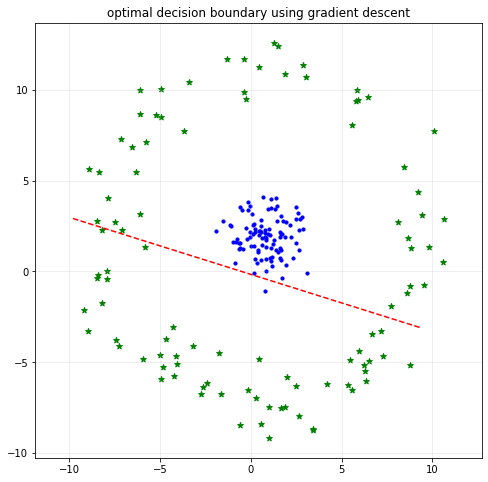

In [25]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('optimal decision boundary using gradient descent')
plt.grid(axis='both', alpha=.25)
# plot graph here
class1= np.where(y==0)
class2 = np.where(y==1)

plt.scatter(X[class1,0], X[class1,1],c='b',s=10)
plt.scatter(X[class2,0], X[class2,1],c='g',marker='*')
# YOUR CODE HERE
point_1,point_2 = boundary_point(X_train,bgd_theta)
plt.plot([point_1[0,0],point_2[0,0]],[point_1[1,0],point_2[1,0]],'--',color='r')
plt.axis('equal')
plt.show()

**Expect result (or look alike):**\
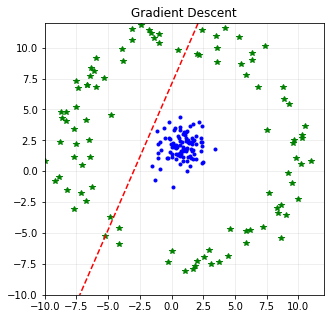

In [26]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 77.5


### Exercise 2.1 (10 points)

Write Newton's method class

In [27]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1/(1+np.exp(-z))
        # YOUR CODE HERE
        #raise NotImplementedError()
        return s

    def softmax(self, z):
        sm = np.exp(z)/(np.exp(z).sum())
        # YOUR CODE HERE
        #raise NotImplementedError()
        return sm
    
    def h(self,X, theta):
        n = np.dot(X,theta)
        hf= self.sigmoid(n)
        # YOUR CODE HERE
       # raise NotImplementedError()
        return hf
    
    def gradient(self, X, y, y_pred):
        n = y.size
        grad = -(X.T).dot ((y-y_pred)/n)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return grad

        
#     def hessian(self, X, y, theta):
#         #hess_mat = None
#         # YOUR CODE HERE
#         #raise NotImplementedError()
#         xTrans = X.transpose()                                      
#         sig = self.sigmoid(np.dot(X,theta))                              
#         result = (1.0/len(x) * np.dot(xTrans, X) * np.diag(sig) * np.diag(1 - sig) )   
#         return result
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        y_hat = self.h(X, theta)
        hess_mat = np.dot(X.T,X) * np.diag((np.dot(y_hat.T,1-y_hat)))/len(y)
        # raise NotImplementedError()
        return hess_mat
        
    def costFunc(self, theta, X, y):
        n=y.size
        y_hat = self.h(X,theta)
        cost = (((-y*np.log(y_hat))-((1-y)*np.log(1-y_hat))).sum())/n
        grad = self.gradient(X,y,y_hat)
        # YOUR CODE HERE
        #raise NotImplementedError()
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            #raise NotImplementedError()
            hessian_mat = self.hessian(X,y,theta)
            cost,grad = self.costFunc(theta,X,y)
            theta= theta - np.linalg.pinv(hessian_mat).dot(grad)
            #J_history.append(cost)
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        y_hat = self.h(X,theta)
        # 2. classify y_predict that what it should be class1 or class2
        for i in range(y_hat.size):
            if y_hat[i]<0.5:
                labels.append(0)
            else:
                labels.append(1)
               
        # 3. append the output from prediction
        # YOUR CODE HERE
       # raise NotImplementedError()
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_predict = self.predict(X,theta)
        percent_correct = 0
        for i in range(y_predict.size):
            if y_predict[i]==y[i]:
                percent_correct = percent_correct +1
        accuracy = (percent_correct/y.size)*100
        # YOUR CODE HERE
        #raise NotImplementedError()
        return accuracy

In [28]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845246]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[-0.04632908]
 [-0.09176432]
 [-0.29214136]]
0.6931471805599453


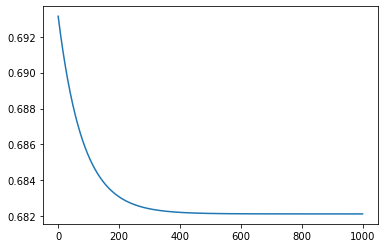

In [29]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expect result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

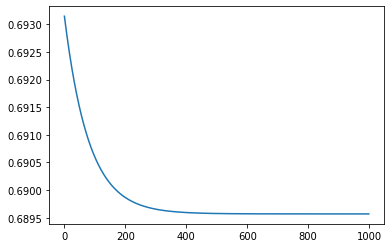

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

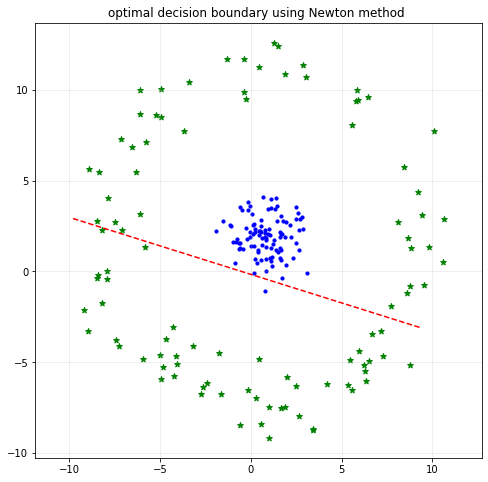

In [30]:
# YOUR CODE HERE
#raise NotImplementedError()
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('optimal decision boundary using Newton method ')
plt.grid(axis='both', alpha=.25)
# plot graph here
class1= np.where(y==0)
class2 = np.where(y==1)

plt.scatter(X[class1,0], X[class1,1],c='b',s=10)
plt.scatter(X[class2,0], X[class2,1],c='g',marker='*')
# YOUR CODE HERE
point_1,point_2 = boundary_point(X_train,nm_theta)
plt.plot([point_1[0,0],point_2[0,0]],[point_1[1,0],point_2[1,0]],'--',color='r')
plt.axis('equal')
plt.show()

**Expect result (or look alike):**

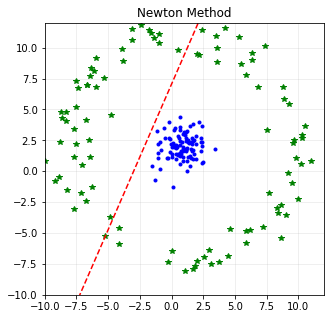

In [31]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 77.5


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

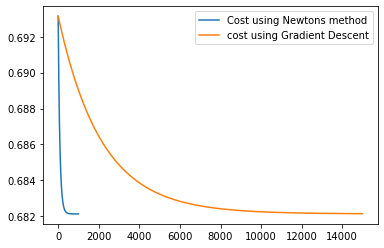

In [32]:
plt.plot(nm_cost,label='Cost using Newtons method')
plt.plot(bgd_cost[:-1][:15000],label='cost using Gradient Descent')
plt.legend()

When we use gradient descent for 50,000 iterations and the final iteration ends on 49999, we know we're still a way from convergence.
The minimum cost for Newton's method is reached after 2686 iterations.
Simply looking at the graph, one can see how quickly Newton's method converges at the minimum when compared to gradient descent. We can change the learning rate and see if the gradient descent improves.

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




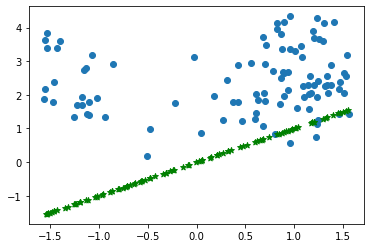

In [33]:
r = np.sqrt(np.square(X[:,0])+np.square(X[:,1]))

angle = np.arctan(X[:,1]/X[:,0])
transfored_X = np.array([angle,r]).T
class1 = np.where(y==0)
class2 = np.where(y==1)

plt.scatter(transfored_X[class1,0],transfored_X[class1,1])
plt.scatter(transfored_X[class2,0],transfored_X[class2,0],c='g',marker='*')

In [34]:
import random
transformed_x_normalized = normalization(transfored_X)
train_size = 0.8
m,n = transformed_x_normalized.shape
index = np.arange(0,m)

random.seed(1000)
random.shuffle(index)
training = round(m*train_size)
idx_train = index[0:training]
idx_test = index[training:]

X_transformed_train = transformed_x_normalized[idx_train,:]
X_transformed_test = transformed_x_normalized[idx_test,:]


Xtrain_ones = np.insert(X_transformed_train,0,1,axis=1)
Xtest_ones = np.insert(X_transformed_test,0,1,axis=1)

y_train = y[idx_train].reshape(-1,1)
y_test = y[idx_test].reshape(-1,1)
print(X_train.shape,y_train.shape)

(160, 2) (160, 1)


Next, using logistic regression.let's try to use the same number of 
iterations for both gradient descent and newtons method.

In [35]:
Xtrain_ones[:5]

array([[ 1.        ,  0.27608632,  1.31403311],
       [ 1.        , -1.69811205, -0.50178826],
       [ 1.        , -1.69735092, -0.62504421],
       [ 1.        ,  0.44155578, -1.01821575],
       [ 1.        ,  0.74671655, -0.11146694]])

## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.

Minimum at iteration: 1999


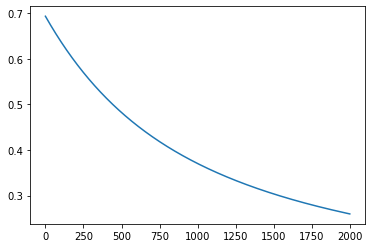

In [36]:
alpha = 0.0025
iterations = 2000
m,n = Xtrain_ones.shape
BGD_model = Logistic_BGD()
initial_theta = np.zeros((n,1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(Xtrain_ones,y_train,initial_theta,alpha,iterations)
plt.plot(bgd_cost)
plt.show()
# YOUR CODE HERE

Minimum at iteration: 999


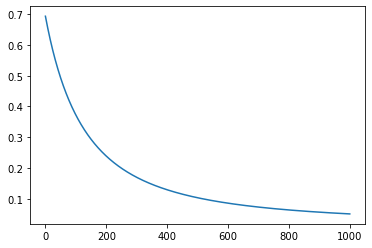

In [37]:
NM_model = Logistic_NM()
iterations=1000
nm_theta, nm_cost = NM_model.newtonsMethod(Xtrain_ones,y_train,initial_theta,iterations)
plt.plot(nm_cost)
plt.show()

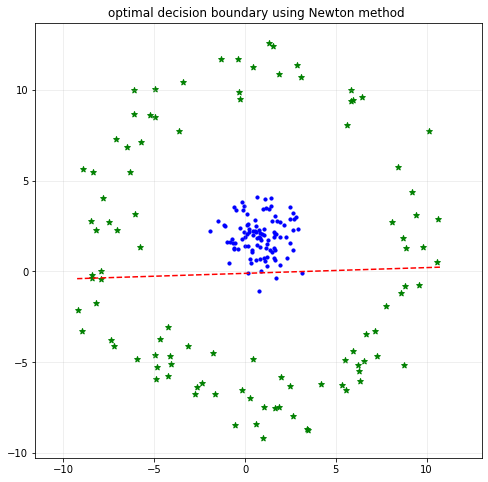

In [38]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('optimal decision boundary using Newton method ')
plt.grid(axis='both', alpha=.25)
# plot graph here
class1= np.where(y==0)
class2 = np.where(y==1)

plt.scatter(X[class1,0], X[class1,1],c='b',s=10)
plt.scatter(X[class2,0], X[class2,1],c='g',marker='*')
# YOUR CODE HERE
point_1,point_2 = boundary_point(X_train,nm_theta)
plt.plot([point_1[0,0],point_2[0,0]],[point_1[1,0],point_2[1,0]],'--',color='r')
plt.axis('equal')
plt.show()

In [39]:
print("accuracy with gradient descent",BGD_model.getAccuracy(Xtest_ones,y_test,bgd_theta))
print("accuracy with newtons method",NM_model.getAccuracy(Xtest_ones,y_test,nm_theta))

accuracy with gradient descent 95.0
accuracy with newtons method 97.5


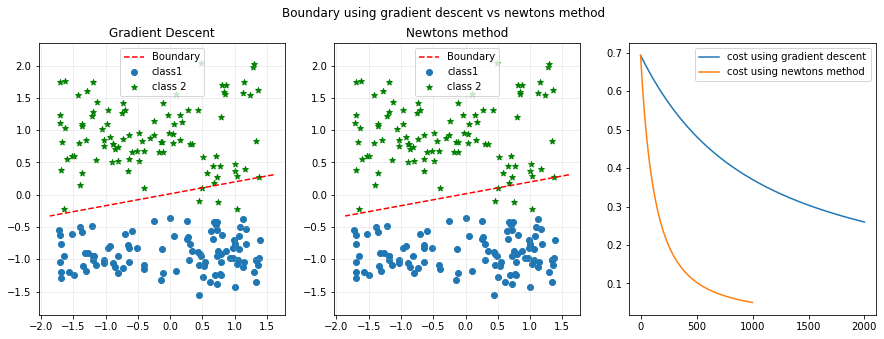

In [44]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Boundary using gradient descent vs newtons method')

ax1.grid(axis='both',alpha=.25)
ax1.scatter(X_transformed_train[class1,0],transformed_x_normalized[class1,1],label='class1')
ax1.scatter(transformed_x_normalized[class2,0],transformed_x_normalized[class2,1],c='g',marker='*',label='class 2')
point_1,point_2 = boundary_point(X_transformed_train,bgd_theta)

ax1.plot([point_1[0,0],point_2[0,0]],[point_1[1,0],point_2[1,0]],'--',color='r',label='Boundary')
ax1.set
ax1.axis('equal')
ax1.legend()
ax1.set_title('Gradient Descent')

ax2.grid(axis='both',alpha=.25)
ax2.scatter(X_transformed_train[class1,0],transformed_x_normalized[class1,1],label='class1')
ax2.scatter(transformed_x_normalized[class2,0],transformed_x_normalized[class2,1],c='g',marker='*',label='class 2')
point_1,point_2 = boundary_point(X_transformed_train,bgd_theta)


ax2.plot([point_1[0,0],point_2[0,0]],[point_1[1,0],point_2[1,0]],'--',color='r',label='Boundary')
ax2.axis('equal')
ax2.legend()
ax2.set_title('Newtons method')

ax3.plot(bgd_cost,label='cost using gradient descent')
ax3.plot(nm_cost,label='cost using newtons method')
ax3.legend();

Here, our data is linearly separable after the polar transformation, our classifier with a linear decision boundary can separate the classes. While using a low alpha value and an equal number of iterations for the logistic gradient descent classifier and the Newtons method to compare the rate of convergence. We can improve gradient descent accuracy by increasing the number of iterations or the value of alpha. However, it appears difficult for gradient descent to outperform Newton's method in terms of the number of iterations required to converge in this specific case.


Both the models give accuracy of 100% if they are trained for enough number of iteration.here, we  can also see the how ploar transformation helps us in separating the two classes.

In [45]:
#task 3
import pandas as pd

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)

Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [46]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [47]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [48]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [49]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [50]:

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [51]:
def fill_gender(data,male_num , female_num):        
    data['Gender'].fillna('Male', inplace = True, limit = male_num)
    data['Gender'].fillna('Female', inplace = True, limit = female_num)  


In [52]:
print(data_train['Gender'].value_counts())

gender_train = data_train['Gender'].value_counts()
gender_train_ratio = gender_train[0]/sum(gender_train.values)
print("Male Gender ratio",gender_train_ratio)

empty_gender_train = (data_train['Gender'].isnull().sum())
print("Empty values:",empty_gender_train)

male_num_train = int(round(gender_train_ratio*empty_gender_train))
print(f"\n Filling {male_num_train} male values and {empty_gender_train - male_num_train} female values")
fill_gender(data_train, male_num_train, empty_gender_train - male_num_train)
print("gender", data_train['Gender'].value_counts())

print("Missing values for train data:\n...........\n",data_train.isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64
Male Gender ratio 0.8136439267886856
Empty values: 13

 Filling 11 male values and 2 female values
gender Male      500
Female    114
Name: Gender, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [53]:
print(data_test['Gender'].value_counts())

gender_test = data_test['Gender'].value_counts()
gender_test_ratio = gender_test[0]/sum(gender_test.values)
print("Male Gender ratio",gender_test_ratio)

empty_gender_test = (data_test['Gender'].isnull().sum())
print("Empty values:",empty_gender_test)

male_num_test = int(round(gender_test_ratio*empty_gender_test))
print(f"\n Filling {male_num_test} male values and {empty_gender_test - male_num_test} female values")
fill_gender(data_test, male_num_test, empty_gender_test - male_num_test)
print("gender", data_test['Gender'].value_counts())

print("Missing values for train data:\n...........\n",data_test.isnull().sum())

Male      286
Female     70
Name: Gender, dtype: int64
Male Gender ratio 0.8033707865168539
Empty values: 11

 Filling 9 male values and 2 female values
gender Male      295
Female     72
Name: Gender, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [54]:
def fill_self_employed(data, yes_num , no_num):        
    data['Self_Employed'].fillna('Yes', inplace = True, limit = yes_num)
    data['Self_Employed'].fillna('No', inplace = True, limit = no_num)  

In [55]:
print(data_train['Self_Employed'].value_counts())

self_employed_train = data_train['Self_Employed'].value_counts()
self_employed_train_ratio = self_employed_train[0]/sum(self_employed_train.values)
print("yes Gender ratio",self_employed_train_ratio)

empty_self_employed_train = (data_train['Self_Employed'].isnull().sum())
print("Empty values:",empty_self_employed_train)

yes_num_train = int(round(self_employed_train_ratio*empty_self_employed_train))
print(f"\n Filling {yes_num_train} yes values and {empty_self_employed_train - yes_num_train} No values")
fill_self_employed(data_train, yes_num_train, empty_self_employed_train - yes_num_train)
print("Self_Employed", data_train['Self_Employed'].value_counts())

print("Missing values for train data:\n...........\n",data_train.isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
yes Gender ratio 0.8591065292096219
Empty values: 32

 Filling 27 yes values and 5 No values
Self_Employed No     505
Yes    109
Name: Self_Employed, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [56]:
LoanAmt_Train = data_train['Loan_Amount_Term'].value_counts()
print("Training value counts:\n",LoanAmt_Train)

loan_amount_mean = np.mean(data_train['Loan_Amount_Term'])
print("Mean of loan amount term",loan_amount_mean)

print("Empty Train value for Loan Amount TermL",(data_train['Loan_Amount_Term'].isnull().sum()))
print("Empty Train value for Loan Amount TermL",(data_test['Loan_Amount_Term'].isnull().sum()))

data_train['Loan_Amount_Term'].fillna(loan_amount_mean,inplace=True,limit=14)

data_test['Loan_Amount_Term'].fillna(loan_amount_mean,inplace=True,limit=14)

print("Empty Train value for Loan Amount TermL",(data_train['Loan_Amount_Term'].isnull().sum()))
print("Empty Train value for Loan Amount TermL",(data_test['Loan_Amount_Term'].isnull().sum()))

Training value counts:
 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Mean of loan amount term 342.0
Empty Train value for Loan Amount TermL 14
Empty Train value for Loan Amount TermL 6
Empty Train value for Loan Amount TermL 0
Empty Train value for Loan Amount TermL 0


In [57]:
def fill_credit_history(data,one_num,zero_num):
    data['Credit_History'].fillna(1.0,inplace = True, limit = one_num)
    data['Credit_History'].fillna(0.0,inplace = True, limit = zero_num)

In [58]:
Credit_History_Train = data_train['Credit_History'].value_counts()
Credit_History_Train_Ratio = Credit_History_Train[1]/sum(Credit_History_Train.values)
print("1.0 ratio value:", Credit_History_Train_Ratio)

empty_credit_history_train = (data_train['Credit_History'].isnull().sum())
print("credit card empty value:",empty_credit_history_train)

one_num_train = int(round(Credit_History_Train_Ratio*empty_credit_history_train))
zero_num_train = empty_credit_history_train - one_num_train
print(f"\n filling  {one_num_train} 1.0 value and {empty_credit_history_train-one_num_train} 0.0 value")

fill_credit_history(data_train,one_num_train,zero_num_train)

print("Missing value for train data:",data_train.isnull().sum())

1.0 ratio value: 0.8421985815602837
credit card empty value: 50

 filling  42 1.0 value and 8 0.0 value
Missing value for train data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [59]:
print("Training data:",data_train.isnull().sum())
print("....................")
print("Testing data",data_test.isnull().sum())

Training data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
....................
Testing data Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [60]:
data_train['Gender'].replace('Male',0,inplace=True)
data_test['Gender'].replace('Male',0,inplace=True)

data_train['Gender'].replace('Female',1,inplace=True)
data_test['Gender'].replace('Female',1,inplace=True)

print("train data:",data_train['Gender'].value_counts())
print("test data:",data_test['Gender'].value_counts())

train data: 0    500
1    114
Name: Gender, dtype: int64
test data: 0    295
1     72
Name: Gender, dtype: int64


In [61]:
data_train['Married'].replace('Yes',1,inplace=True)
data_test['Married'].replace('Yes',1,inplace=True)

data_train['Married'].replace('No',0,inplace=True)
data_test['Married'].replace('No',0,inplace=True)

print("train data:\n",data_train['Married'].value_counts())
print("test data:\n",data_test['Married'].value_counts())

train data:
 1    400
0    214
Name: Married, dtype: int64
test data:
 1    233
0    134
Name: Married, dtype: int64


In [62]:
data_train['Education'].replace('Graduate',1,inplace=True)
data_test['Education'].replace('Graduate',1,inplace=True)

data_train['Education'].replace('Not Graduate',0,inplace=True)
data_test['Education'].replace('Not Graduate',0,inplace=True)

print("train data:\n",data_train['Education'].value_counts())
print("test data:\n",data_test['Education'].value_counts())

train data:
 1    480
0    134
Name: Education, dtype: int64
test data:
 1    283
0     84
Name: Education, dtype: int64


In [63]:
data_train['Self_Employed'].replace('Yes',1,inplace=True)
data_test['Self_Employed'].replace('Yes',1,inplace=True)

data_train['Self_Employed'].replace('No',0,inplace=True)
data_test['Self_Employed'].replace('No',0,inplace=True)

print("train data:\n",data_train['Self_Employed'].value_counts())
print("test data:\n",data_test['Self_Employed'].value_counts())

train data:
 0    505
1    109
Name: Self_Employed, dtype: int64
test data:
 0.0    307
1.0     37
Name: Self_Employed, dtype: int64


In [64]:
data_train['Loan_Status'].replace('Y',1,inplace=True)
data_train['Loan_Status'].replace('N',0,inplace=True)
print("train data:\n",data_train['Loan_Status'].value_counts())


train data:
 1    422
0    192
Name: Loan_Status, dtype: int64


In [65]:
import random
train_size = 0.8
m,n = X.shape
y = y.reshape(m,1)
X = normalization(X)
index = np.arange(0,m)

random.seed(1000)
random.shuffle(index)
training = round(m*train_size)
idx_train = index[0:training]
idx_test = index[training:]

X_train = X[idx_train,:]
X_test = X[idx_test,:]
y_train = y[idx_train].reshape(-1,1)
y_test = y[idx_test].reshape(-1,1)
print(X_train.shape,y_train.shape)

(160, 2) (160, 1)


Minimum at iteration: 999
theta: [[-0.09114881]
 [-0.29011422]]
0.9683729221554278


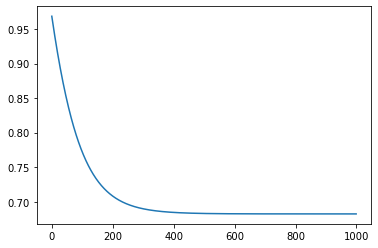

In [66]:
lNM_model = Logistic_NM()

iterations = 1000
theta=np.ones((n,1))
nm_theta, nm_cost = lNM_model.newtonsMethod(X_train, y_train, theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()


Minimum at iteration: 8732
Minimum at iteration: 178


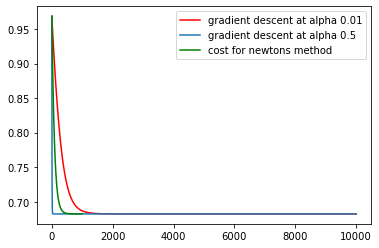

In [69]:
iterations = 10000
m,n = X_train.shape
lgd_model = Logistic_BGD()
lgd_theta1, lgd_cost1 = lgd_model.gradientAscent(X_train,y_train,theta, 0.01,iterations)
lgd_theta2, lgd_cost2 = lgd_model.gradientAscent(X_train,y_train,theta,0.5,iterations)


plt.plot(bgd_cost1,label ='gradient descent at alpha 0.01',color='r')
plt.plot(bgd_cost2,label='gradient descent at alpha 0.5',)
plt.plot(nm_cost,label='cost for newtons method',color='g')
plt.legend()
plt.show()

In [70]:
print("accuracy for gradient descent",lgd_model.getAccuracy(X_test,y_test,lgd_theta2))
print("accuracy for newtons method",lNM_model.getAccuracy(X_test,y_test,nm_theta))

accuracy for gradient descent 75.0
accuracy for newtons method 75.0


**Conclusion:**

for this dataset, while using a good enough alpha, gradient descent did better than newtons method to reach convergence. After some research, I found that when we choose poor initial theta values, the Newton's method may occasionally perform poorly or not at all. The Newton's method converges 300 iterations faster on our dataset when the initial theta is changed from zeros to ones.

In this lab, we started by creating two classes of data that couldn't be separated linearly. and started   categorize them, by using  logistic regression (gradient descent as well as newtons methods.)however,even though we got accuracy score of 70%
we could clearly see from the decision boundary that our model was not working well.

The next step was to convert our data into sets of classes that could be linearly separated. We changed the circular data by substituting polar coordinates for them. As a result, we were able to get a dataset that could be linearly separated and achieve accuracy scores of 100%. For the same dataset, we could see that Newton's method required fewer iterations to converge than gradient descent did.

Here, in  dataset from lab-3, the Newton's method might take longer to converge. To evaluate the accuracy score and performance, we performed some dataset cleaning, gradient descent, and Newton's method. The accuracy rate for both approaches was 75%.